# Importing Modules

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [44]:
import pandas as pd
import numpy as np

churn_data = pd.read_excel("customer_churn_large_dataset.xlsx")
churn_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# Data PreProcessing

In [45]:
churn_data.dropna()
churn_data.drop("Name" , axis = 1 , inplace= True)
churn_data.drop("CustomerID" , axis = 1 , inplace= True)

#Vectorizing Genders

churn_data["Gender"] = churn_data["Gender"].apply(lambda g: 1 if g=="Male" else 0)

#Vectorizing Cities

locations = list(churn_data["Location"].unique())
# churn_data["Location"] = churn_data["Location"].apply(lambda x: locations.index(x)
churn_data = pd.get_dummies(churn_data,columns=["Location"], prefix='',prefix_sep='')

churn_data.head(10)


,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Chicago,Houston,Los Angeles,Miami,New York
0,63,1,17,73.36,236,0,False,False,True,False,False
1,62,0,1,48.76,172,0,False,False,False,False,True
2,24,0,5,85.47,460,0,False,False,True,False,False
3,36,0,3,97.94,297,1,False,False,False,True,False
4,46,0,19,58.14,266,0,False,False,False,True,False
5,67,1,15,82.65,456,1,False,False,False,False,True
6,30,0,3,73.79,269,0,True,False,False,False,False
7,67,0,1,97.70,396,1,False,False,False,True,False
8,20,0,10,42.45,150,1,False,False,False,True,False
9,53,0,12,64.49,383,1,False,False,True,False,False


In [59]:
churn_data["val2money"] = (churn_data["Subscription_Length_Months"] * churn_data["Total_Usage_GB"]) / churn_data["Monthly_Bill"]

churn_data.head()

,Age,Gender,Los Angeles,Chicago,Houston,Miami,New York,Monthly_Bill,Subscription_Length_Months,Total_Usage_GB,Churn,val2money
0,63,1,1,0,0,0,0,73.36,17,236,0,54.689204
1,62,0,0,0,0,0,1,48.76,1,172,0,3.527482
2,24,0,1,0,0,0,0,85.47,5,460,0,26.910027
3,36,0,0,0,0,1,0,97.94,3,297,1,9.097407
4,46,0,0,0,0,1,0,58.14,19,266,0,86.928105


In [60]:

churn_data = churn_data.loc[:,["Age","Gender","Los Angeles","Chicago","Houston","Miami","New York","Monthly_Bill","Subscription_Length_Months","Total_Usage_GB","val2money","Churn"]]

for city in locations:
    churn_data[city] = (churn_data[city] == True).astype(int)

churn_data.head()

,Age,Gender,Los Angeles,Chicago,Houston,Miami,New York,Monthly_Bill,Subscription_Length_Months,Total_Usage_GB,val2money,Churn
0,63,1,1,0,0,0,0,73.36,17,236,54.689204,0
1,62,0,0,0,0,0,1,48.76,1,172,3.527482,0
2,24,0,1,0,0,0,0,85.47,5,460,26.910027,0
3,36,0,0,0,0,1,0,97.94,3,297,9.097407,1
4,46,0,0,0,0,1,0,58.14,19,266,86.928105,0


<Axes: >

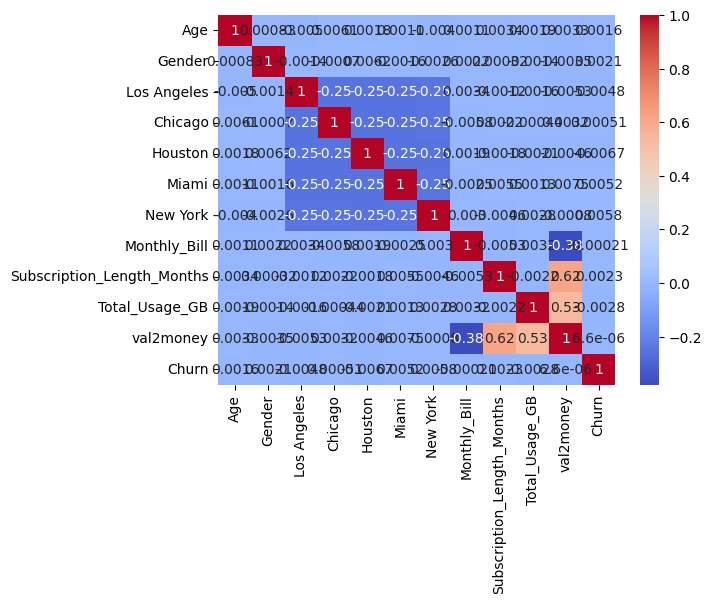

In [61]:
import matplotlib.pyplot as plt
import seaborn as sn

corr = churn_data.corr()

sn.heatmap(corr,annot=True,cmap="coolwarm")

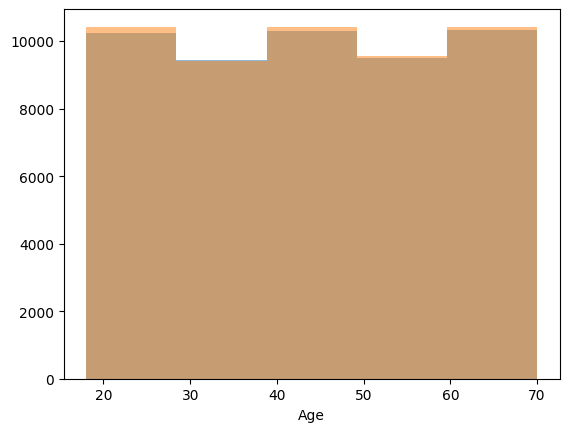

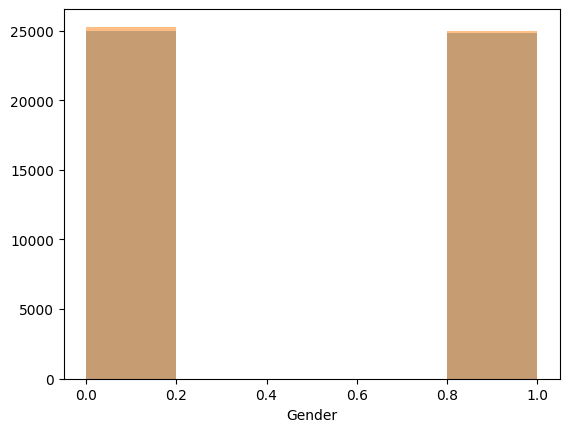

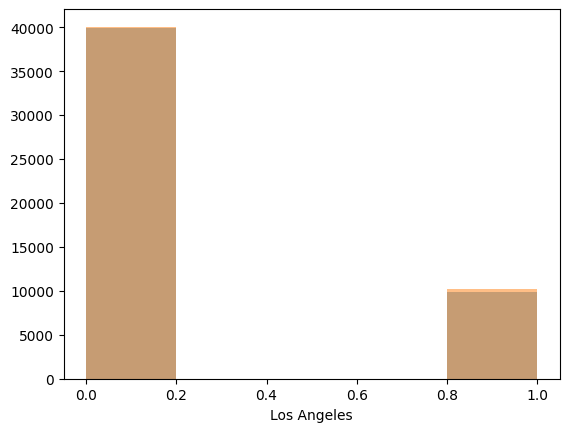

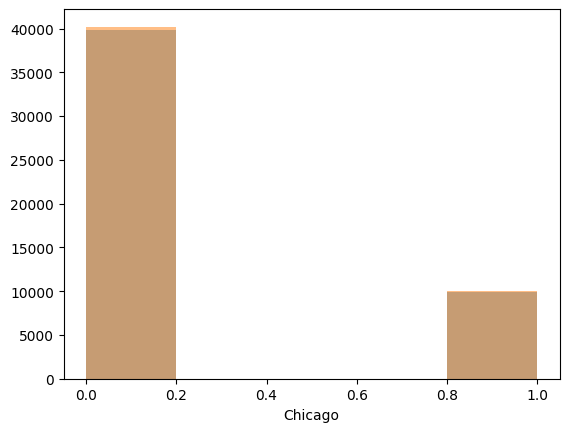

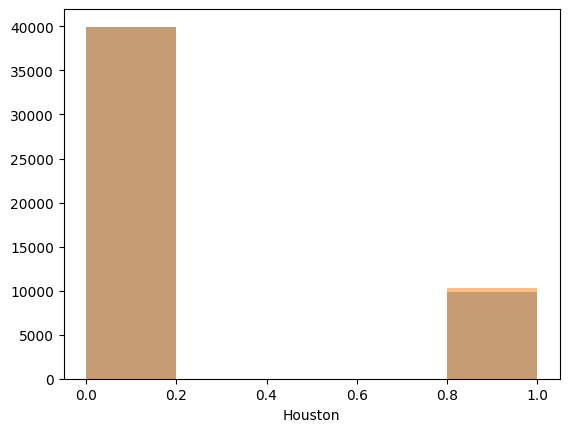

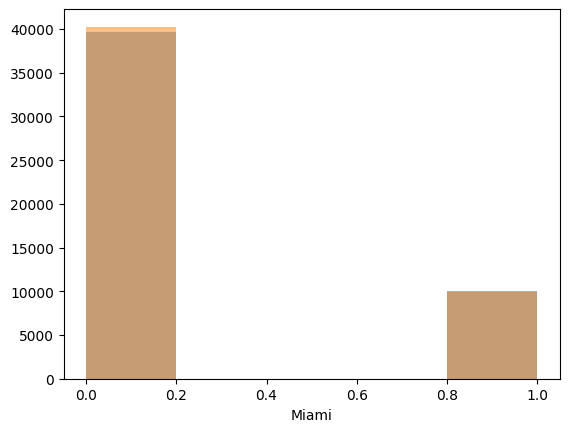

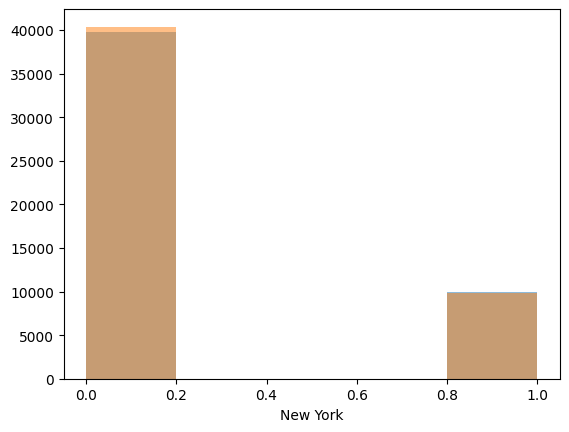

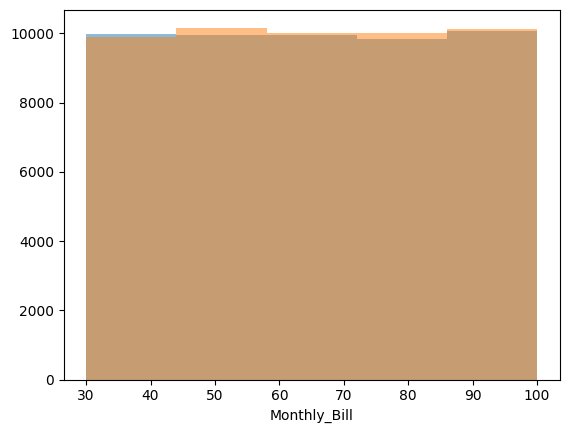

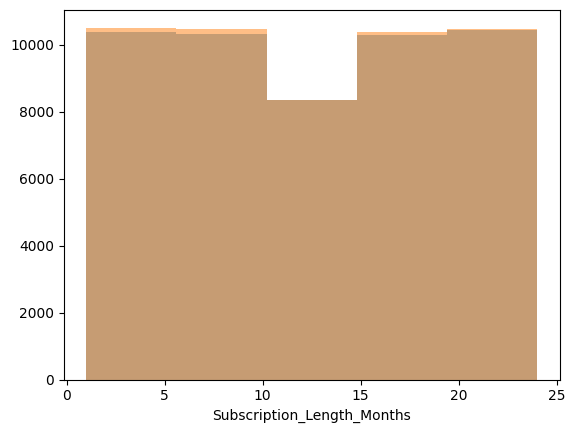

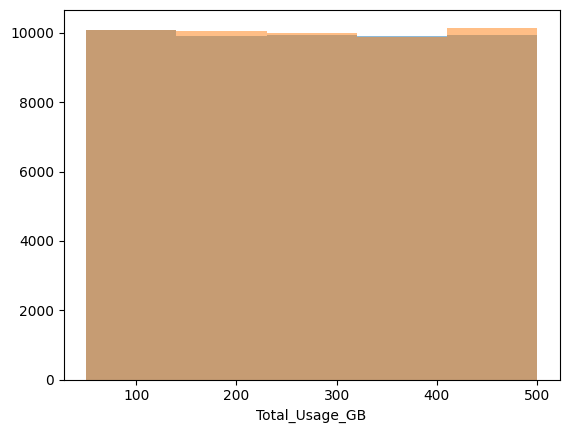

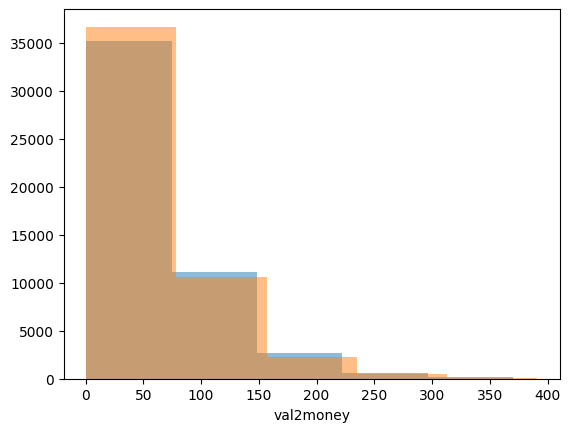

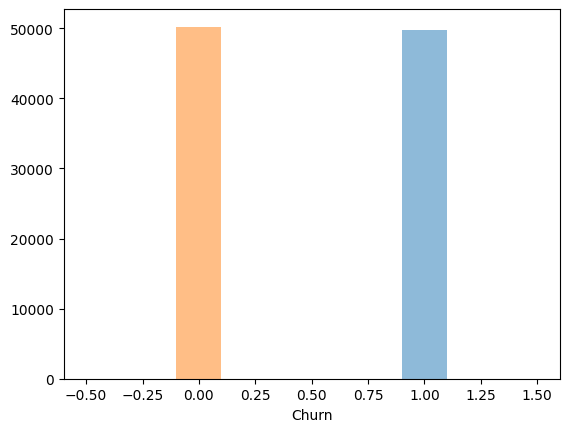

In [134]:
churn = churn_data[churn_data['Churn'] == 1]
no_churn = churn_data[churn_data['Churn'] == 0]

for col in churn_data:
    # Create histograms for Churn and No Churn
    plt.hist(churn[col], alpha=0.5, label='Churn', bins=5)
    plt.hist(no_churn[col], alpha=0.5, label='No Churn', bins=5)
    plt.xlabel(col)
    plt.show()


# Training Validation And Test Datasets

In [95]:
churn_df = churn_data.sample(frac = 1)
train , test = np.split(churn_df , [int(0.8*len(churn_df))])   

In [96]:
print(len(train))
train.head()


80000


,Age,Gender,Los Angeles,Chicago,Houston,Miami,New York,Monthly_Bill,Subscription_Length_Months,Total_Usage_GB,val2money,Churn
64481,54,0,0,0,0,0,1,96.20,4,489,20.332640,0
66204,21,1,0,0,1,0,0,35.93,21,294,171.834122,1
11189,55,1,1,0,0,0,0,35.38,23,358,232.730356,0
78491,49,1,1,0,0,0,0,69.42,23,322,106.683953,1
44635,68,1,0,0,1,0,0,70.22,10,236,33.608659,1


In [97]:

print(len(test))
test.head()


20000


,Age,Gender,Los Angeles,Chicago,Houston,Miami,New York,Monthly_Bill,Subscription_Length_Months,Total_Usage_GB,val2money,Churn
66671,24,0,1,0,0,0,0,49.19,2,169,6.871315,0
41550,30,0,1,0,0,0,0,81.01,6,161,11.924454,0
52960,70,0,0,1,0,0,0,60.25,18,189,56.464730,0
82377,55,0,0,0,1,0,0,35.60,5,178,25.000000,1
18149,41,0,1,0,0,0,0,72.02,24,480,159.955568,1


In [98]:
def scale_dataset(df, oversample=False):
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X , y)

    data = np.hstack((X , np.reshape( y , (-1, 1))))

    return data , X , y

In [99]:
np.unique(train.columns[-1])

array(['Churn'], dtype='<U5')

In [100]:
train , x_train , y_train = scale_dataset(train,oversample=True)
test , x_test , y_test = scale_dataset(test , oversample= False)

In [101]:
x_train[2000]

array([-1.57445903,  1.00388254, -0.5006054 ,  2.00595697, -0.50283045,
       -0.50095685, -0.49708812, -1.67493846, -1.51620545, -0.60885157,
       -0.87903644])

# Logistic Regression Model

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [106]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)


LogisticRegression()

In [110]:
y_pred = lr_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.47      0.49     10103
           1       0.50      0.54      0.52      9897

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



# Support Vector Machine

In [125]:
from sklearn.svm import SVC

In [126]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [127]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.54      0.51      0.52     10826
           1       0.46      0.50      0.48      9174

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

